In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
weather = pd.read_csv('Data/Weather/Stations-Observations Merged-Converted-with FIPS/NOAA_daily_weather_observations_with_stations_2020_to_2022_converted_with_FIPS.csv')
weather['DATE']=pd.to_datetime(weather['DATE'], format='%Y%m%d')

In [3]:
max_temps=weather[weather['ELEMENT']=='TMAX_F']
min_temps=weather[weather['ELEMENT']=='TMIN_F']

In [ ]:
temps= pd.concat((max_temps, min_temps), ignore_index=True)
temps = temps.sort_values(['ID','DATE'], ignore_index=True)
avgtemps = pd.DataFrame(temps.groupby(['ID', 'COUNTY', 'FIPS', 'DATE'])['DATA_VALUE'].mean())
avgtemps = avgtemps.reset_index()  

In [4]:
cases = pd.read_csv('Data/Covid Cases/Covid Cases with FIPS/Covid_Cases_Reduced_with_FIPS.csv')
cases['Date']=pd.to_datetime(cases['Date'], format='%Y-%m-%d')
cases.head()

,Date,County,State,FIPS,Cases,Deaths,TotalTests,PositiveTest
0,2020-03-22,Alameda,CA,6001.0,24,2,175,14
1,2020-03-25,Alameda,CA,6001.0,32,2,435,49
2,2020-03-27,Alameda,CA,6001.0,40,2,469,34
3,2020-03-28,Alameda,CA,6001.0,18,3,253,25
4,2020-04-01,Alameda,CA,6001.0,68,2,461,61


In [5]:
def simple_graph(county):
    plt.bar(max_temps[max_temps['COUNTY']==county]['DATE'], max_temps[max_temps['COUNTY']==county]['DATA_VALUE'])
    plt.bar(min_temps[min_temps['COUNTY']==county]['DATE'], min_temps[min_temps['COUNTY']==county]['DATA_VALUE'])
    plt.bar(cases[cases['County']==county]['Date'], cases[cases['County']==county]['Cases'])
    #plt.legend(['Max Temp', 'Min Temp'])
    plt.figure(figsize=(2,2))
    plt.show()

In [6]:
def double_bar_hi_lo_temp(county):
 
    # Creating plot with dataset_1
    fig, ax1 = plt.subplots()

    ax1.set_xlabel('date')
    ax1.set_ylabel('temp', color='tab:red')
    ax1.bar(max_temps[max_temps['COUNTY']==county]['DATE'], max_temps[max_temps['COUNTY']==county]['DATA_VALUE'], color = 'tab:red')
    ax1.bar(min_temps[min_temps['COUNTY']==county]['DATE'], min_temps[min_temps['COUNTY']==county]['DATA_VALUE'], color = 'tab:blue')
    plt.xticks(rotation=45, ha='right')
    ax1.tick_params(axis ='y')

    # Adding Twin Axes to plot using dataset_2
    ax2 = ax1.twinx()

    ax2.set_ylabel('cases', color='tab:green')
    ax2.bar(cases[cases['County']==county]['Date'], cases[cases['County']==county]['Cases'], color = 'tab:green')
    ax2.tick_params(axis ='y')


    # Adding title
    plt.title('Use different y-axes on the left and right of a Matplotlib plot', fontweight ="bold")

    # Show plot
    fig.savefig('Graph/'+county+'_bar.png', bbox_inches='tight')
    
    plt.show()

In [77]:
def double_line_avg_temp(county):
    
    # Creating plot with dataset_1
    fig, ax1 = plt.subplots()
    
    ax1.set_xlabel('date')
    ax1.set_ylabel('Avg Temp', color='tab:blue')
    ax1.plot(avgtemps[avgtemps['COUNTY']== county]['DATE'], avgtemps[avgtemps['COUNTY']== county]['DATA_VALUE'], color = 'tab:blue')
    plt.xticks(rotation=45, ha='right')
    ax1.tick_params(axis ='y')
    
    # Adding Twin Axes to plot using dataset_2
    ax2 = ax1.twinx()
    
 
    ax2.set_ylabel('cases', color='tab:green')
    #ax2.set_ylabel('deaths', color='tab:red')
    ax2.plot(cases[cases['County']== county]['Date'], cases[cases['County']== county]['Cases'], color = 'tab:green')
    ax2.plot(cases[cases['County']== county]['Date'], cases[cases['County']== county]['Deaths'], color = 'tab:red')

    ax2.tick_params(axis ='y')


    # Adding title
    plt.title(county, fontweight ="bold")

    # Show plot
    fig.savefig('Graph/'+county+'_line.png', dpi = 300, bbox_inches='tight')
    plt.show()

NameError: name 'mdates' is not defined

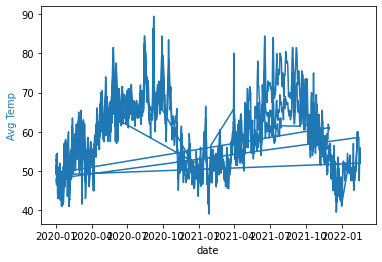

In [78]:
double_line_avg_temp('Alameda')

In [10]:
list_of_counties = avgtemps['COUNTY'].unique()

In [ ]:
for county in list_of_counties:
    double_line_avg_temp(county)

In [83]:
alpine = cases[cases['County']== 'Alpine']

In [84]:
alpine

,Date,County,State,FIPS,Cases,Deaths,TotalTests,PositiveTest
